In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('Youtube_dataset_all_dataScience_channels.csv')

In [3]:
df.head()

,Channel_Name,Title,Published_date,Views,Like_count,Comment_Count
0,Rishabh Mishra,POWER BI Full PROJECT for Data Analysis with P...,2024-04-20,157284.0,5575.0,632.0
1,Rishabh Mishra,AI Revolution - Future of Data Analyst Jobs & ...,2024-03-23,78155.0,2712.0,245.0
2,Rishabh Mishra,Reality of Data Analyst Courses and Data Scien...,2024-03-16,43627.0,1285.0,267.0
3,Rishabh Mishra,Personal Portfolio Website for Beginners | How...,2024-01-21,129956.0,3462.0,358.0
4,Rishabh Mishra,How To Create LinkedIn Profile in 2024 | Linke...,2024-01-17,143309.0,3389.0,192.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Channel_Name    23002 non-null  object 
 1   Title           23002 non-null  object 
 2   Published_date  23002 non-null  object 
 3   Views           23000 non-null  float64
 4   Like_count      22967 non-null  float64
 5   Comment_Count   22975 non-null  float64
dtypes: float64(3), object(3)
memory usage: 1.1+ MB


### Data Type Adjustments 📅

**Enhancing Data Integrity**:
1. **Convert `Published_date` to datetime**:
   - Converting the `Published_date` column to datetime format enables chronological analysis and facilitates time-based insights.

2. **Convert `Views`, `Like_count`, and `Comment_Count` to integer**:
   - Since these metrics represent counts (e.g., number of views, likes, comments), converting them to integer type ensures data consistency and facilitates numerical operations and statistical analysis.

In [7]:
df.shape

(23002, 6)

In [9]:
df.isnull().sum()

Channel_Name       0
Title              0
Published_date     0
Views              2
Like_count        35
Comment_Count     27
dtype: int64

In [15]:
df[df.isnull().any(axis=1)].shape

(62, 6)

In [17]:
df[df.isnull().any(axis=1)]['Published_date'].unique()

array(['2021-05-12', '2021-02-19', '2016-05-18', '2016-04-15',
       '2016-06-24', '2016-03-27', '2015-07-17', '2013-11-21',
       '2013-11-18', '2013-11-07', '2012-08-30', '2012-01-02',
       '2019-07-12', '2023-05-25', '2023-05-24', '2023-11-19',
       '2021-01-05', '2014-02-09', '2011-07-26', '2011-04-22',
       '2010-07-22', '2010-06-22', '2010-03-23', '2010-01-01',
       '2009-12-30', '2009-11-30', '2009-07-07', '2009-06-15',
       '2009-05-08', '2009-04-19', '2009-03-27', '2009-03-01',
       '2009-01-23', '2009-01-09', '2009-01-03', '2008-12-23'],
      dtype=object)

### Conclusion on NaN Values 📊

1. **Nature of NaN Values**:
   - The NaN values in the dataset likely correspond to the earliest videos on the channel. These videos have no views, likes, or comments, hence the missing values.
   - **Total Rows**: 23,002
   - **Missing Value Rows**: 62
   - **Observation**: Most NaN values are from videos published in 2009 and 2010, with a few scattered across other years.

2. **Reasons for NaN Values**:
   - **Early Internet Era**: The majority of NaN data dates belong to 2009 and 2010, a period when internet usage and video consumption were relatively lower compared to recent years. This could explain the lack of engagement (views, likes, comments) on these videos.

### Handling Missing Values 🛠️

**Steps to Handle Missing Values**:
1. **Remove Missing Values**:
   - This is generally not recommended unless the missing data is insignificant or irrelevant to the analysis.
   
2. **Impute Missing Values with Zero**:
   - Given the context, it is logical to replace NaN values with zero. This approach reflects the reality that these videos received no engagement and preserves the completeness of the dataset.
   - **Rationale**: This option maintains the integrity of the data by accurately representing videos with no views, likes, or comments.

In [19]:
df.fillna(value=0,inplace=True)

In [22]:
df['Published_date'] = pd.to_datetime(df['Published_date'])
df['Views'] = df['Views'].astype(int)
df['Like_count'] = df['Like_count'].astype(int)
df['Comment_Count'] = df['Comment_Count'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Channel_Name    23002 non-null  object        
 1   Title           23002 non-null  object        
 2   Published_date  23002 non-null  datetime64[ns]
 3   Views           23002 non-null  int32         
 4   Like_count      23002 non-null  int32         
 5   Comment_Count   23002 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(2)
memory usage: 808.8+ KB


In [50]:
df.duplicated().sum()

0

No Duplicated Value are Present

In [154]:
df['Channel_Name'].unique()

array(['Rishabh Mishra', 'StatQuest with Josh Starmer',
       'Nicholas Renotte', 'Leila Gharani', 'Ryan Nolan Data',
       'WsCube Tech', 'codebasics', 'Ken Jee', 'Kaggle', 'Luke Barousse',
       'DeepLearningAI', 'Dataquest', 'Keith Galli', 'Darshil Parmar',
       'Rob Mulla', 'Andrej Karpathy', 'Tina Huang', 'sentdex', 'CampusX',
       'Chandoo', 'freeCodeCamp.org', 'Socratica', 'Kevin Stratvert',
       'Tableau Tim', 'Thu Vu data analytics', 'Guy in a Cube',
       'Krish Naik', 'techTFQ', 'ExcelIsFun', 'Alex The Analyst'],
      dtype=object)

## Krish Nayak Channel Analysis

In [119]:
df_KN=df[df['Channel_Name']=='Krish Naik']

In [155]:
df_KN.shape

(1836, 6)

### Detailed Analysis of Video Count Trends:

In [130]:
df_KN_Year=df_KN.groupby(df_KN['Published_date'].dt.year).agg({
    'Title': 'count',
    'Views':'sum',
    'Like_count': 'sum',
    'Comment_Count': 'sum'
}).reset_index()
df_KN_Year.columns = ['Year', 'Video_Count', 'Total_Views', 'Total_Likes', 'Total_Comments']

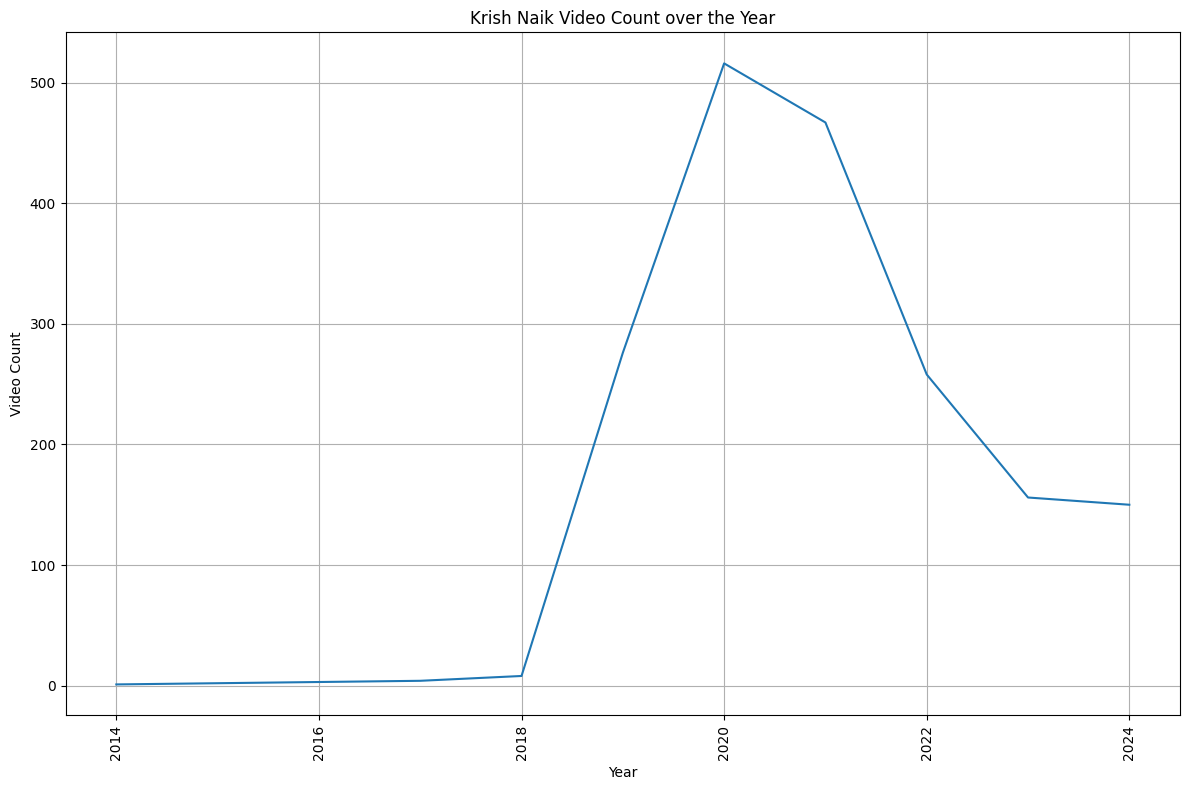

In [132]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_KN_Year,x=df_KN_Year['Year'],y=df_KN_Year['Video_Count'],)
plt.xlabel('Year')
plt.ylabel('Video Count')
plt.title('Krish Naik Video Count over the Year')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1. **2014-2018: Initial Stagnation**
   - **Observation**: During this period, there was minimal growth in video uploads.
   - **Possible Reasons**: 
     - **Early Stage Development**: Krish Naik's channel may have been in its infancy, focusing on establishing content and audience.
     - **Content Strategy**: The focus could have been on quality over quantity or testing different content types.

#### 2. **Jio Era (2016-2018): Accelerated Growth**
   - **Observation**: Video uploads started to increase notably.
   - **Impact of Jio Launch**: 
     - **Improved Internet Accessibility**: The launch of Jio 4G in India led to widespread internet access, potentially expanding the channel's audience.
     - **Educational Demand**: Increased demand for educational content could have driven higher production rates.

#### 3. **COVID-19 Peak (2020-2021): Surge in Frequency**
   - **Observation**: Video uploads peaked during the COVID-19 pandemic.
   - **Pandemic Effect**: 
     - **Shift to Online Education**: With lockdowns and restrictions, there was a surge in online learning, boosting demand for educational videos.
     - **Content Adaptation**: Krish Naik's channel may have adapted quickly to meet the increased demand, resulting in higher upload rates.

#### 4. **Post-COVID (2023 onwards): Stabilization or Decline**
   - **Observation**: Video frequency decreased or stabilized after 2021.
   - **Possible Factors**: 
     - **Return to Normalcy**: As pandemic restrictions eased, there might have been a shift in audience behavior or priorities.
     - **Content Strategy Adjustment**: The channel may have refocused on specific topics or adjusted upload schedules based on audience feedback.

### Analysis of Engagement Metrics Trends (Total Views, Likes, and Comments Trends):

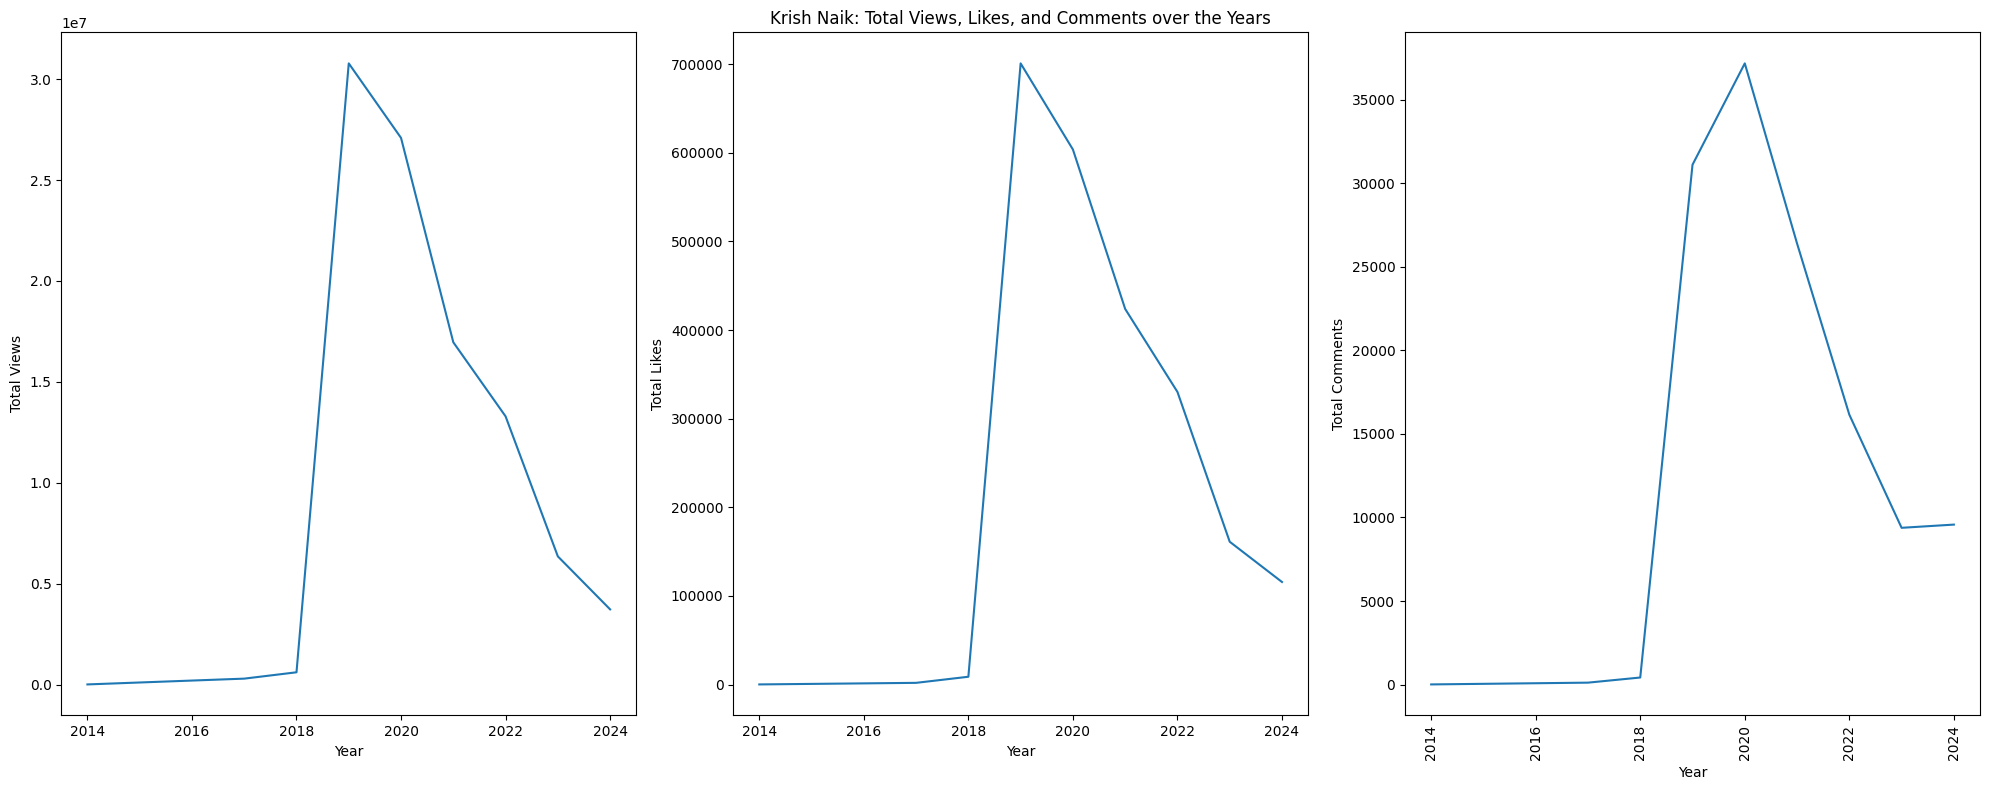

In [147]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8), sharex=True)
sns.lineplot(data=df_KN_Year, x='Year', y='Total_Views', ax=ax1)
ax1.set_ylabel('Total Views')
sns.lineplot(data=df_KN_Year, x='Year', y='Total_Likes', ax=ax2)
ax2.set_title('Krish Naik: Total Views, Likes, and Comments over the Years')
ax2.set_ylabel('Total Likes')
sns.lineplot(data=df_KN_Year, x='Year', y='Total_Comments', ax=ax3)
ax3.set_ylabel('Total Comments')
ax3.set_xlabel('Year')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Insight:

1. **2014-2018: Early Growth Phase**
   - **Observation**: All metrics (views, likes, comments) showed gradual growth as the channel established its audience.
   - **Reason**: Initial content attracted early viewers interested in emerging educational topics, setting a foundation for engagement.

2. **Jio Era (2016-2018): Rapid Growth Period**
   - **Observation**: Significant spikes in views, likes, and comments during this period.
   - **Impact**: Improved internet access (Jio 4G launch) and rising demand for educational content boosted all engagement metrics.

3. **COVID-19 Peak (2020-2021): Surge in Engagement**
   - **Observation**: Peak levels of views, likes, and comments were observed.
   - **Reason**: Lockdowns increased online education demand, making Krish Naik's content highly relevant and engaging for a larger audience.

4. **Post-COVID (2023 onwards): Stabilization or Adjustment**
   - **Observation**: Metrics stabilized or adjusted post-2021.
   - **Transition**: As pandemic effects subsided, metrics settled as the channel adapted its content strategy to evolving viewer behaviors.

### Top 5 videos each year based on the number of views

In [151]:
years=df_KN['Published_date'].dt.year.unique().tolist()

In [153]:
for year in years:
    year_data=df_KN[df_KN['Published_date'].dt.year==year]
    year_data_sorted = year_data.sort_values(by='Views', ascending=False)
    print(year)
    display(year_data_sorted.head(5)[['Published_date', 'Title', 'Views', 'Like_count', 'Comment_Count']])

2024


,Published_date,Title,Views,Like_count,Comment_Count
17120,2024-03-13,First AI Software Engineer Devin By Cognition ...,184407,3727,626
17149,2024-02-01,Mass Layoff In 2024- What the Hell Is Happening?,96773,1837,363
17172,2024-01-03,Complete Langchain GEN AI Crash Course With 6 ...,91911,3527,160
17076,2024-04-22,Things Required To Master Generative AI- A Mus...,84550,2276,61
17135,2024-02-11,Steps By Step Tutorial To Fine Tune LLAMA 2 Wi...,83396,1982,117


2023


,Published_date,Title,Views,Like_count,Comment_Count
17291,2023-03-04,Now you Can Crack Any ML Interviews- Announcin...,494458,3974,135
17290,2023-03-05,Tutorial 1- End To End ML Project With Deploym...,299143,4641,387
17188,2023-12-12,Roadmap to Learn Generative AI(LLM's) In 2024 ...,185643,6322,108
17175,2023-12-29,Roadmap to Learn Data Science & Industry Ready...,166007,5336,208
17267,2023-05-28,End To End NLP Project Implementation With Dep...,158568,2625,202


2022


,Published_date,Title,Views,Like_count,Comment_Count
17439,2022-06-19,Complete Statistics For Data Science In 6 hour...,784993,16589,452
17460,2022-05-28,Complete Machine Learning In 6 Hours| Krish Naik,767083,14427,335
17559,2022-01-22,Live Day 1- Introduction To statistics In Data...,584688,15376,376
17544,2022-02-01,Live Day 1- Introduction To Machine Learning A...,536237,11844,265
17586,2022-01-04,Learning Data Science In 2022- Step By Step Plan,453149,6973,207


2021


,Published_date,Title,Views,Like_count,Comment_Count
17603,2021-12-11,OTT Platform For Education OneNeuron- Educatio...,737150,986,111
17706,2021-08-10,My Salary As A Data Scientist From Starting Of...,412037,11883,591
17713,2021-08-06,7 Days Plan To Learn Statistics For Data Analy...,371289,4701,118
17860,2021-05-08,Why Deep Learning Is Becoming So Popular?🔥🔥🔥🔥🔥🔥,316340,2628,46
17867,2021-05-04,Tutorial 1-Pyspark With Python-Pyspark Introdu...,287216,3264,345


2020


,Published_date,Title,Views,Like_count,Comment_Count
18167,2020-09-18,Complete Road Map To Be Expert In Python- Foll...,1829168,20024,488
18057,2020-12-30,Negotiating Salaries With HR for Any Job Is An...,750417,16570,597
18157,2020-09-25,Complete Road Map To Prepare NLP-Follow This V...,657740,4935,148
18272,2020-06-30,Live- Implementation of End To End Kaggle Mach...,604542,14067,674
18559,2020-01-10,"Tutorial 32- All About P Value,T test,Chi Squa...",547768,10520,307


2019


,Published_date,Title,Views,Like_count,Comment_Count
18607,2019-11-26,AI VS ML VS DL VS Data Science,2829816,67918,1749
18725,2019-08-22,How To Learn Data Science Smartly?,1642956,52245,1286
18716,2019-08-27,How To Learn Data Science by Self Study and Fo...,543762,28056,1005
18681,2019-09-23,Tutorial 1- Anaconda Installation and Python B...,458231,5278,232
18722,2019-08-24,Tutorial 43-Random Forest Classifier and Regre...,388978,13462,436


2018


,Published_date,Title,Views,Like_count,Comment_Count
18850,2018-07-02,Principle Component Analysis (PCA) using sklea...,211975,3640,158
18847,2018-12-31,Population vs Sample in Statistics,191496,2130,78
18848,2018-09-04,How to select the best model using cross valid...,67402,1567,79
18851,2018-06-06,PySpark Tutorial for Beginners | Apache Spark ...,41230,633,42
18853,2018-02-24,Artificial Neural Network Intuition,39671,267,7


2017


,Published_date,Title,Views,Like_count,Comment_Count
18858,2017-11-25,What is Machine Learning in Data Science- Mach...,154308,947,49
18856,2017-11-26,Anaconda installation with Packages- Machine L...,78735,363,39
18857,2017-11-26,What is Supervised Machine Learning- Machine L...,37713,421,16
18855,2017-11-26,Important libraries used in python Data Scienc...,22137,192,15


2014


,Published_date,Title,Views,Like_count,Comment_Count
18859,2014-06-01,Maeri unplugged by Krish and band,5999,148,13


### Monthly Analysis of Krish Naik's Channel Metrics

In [156]:
df_KN_Month=df_KN.groupby(df_KN['Published_date'].dt.month_name()).agg({
    'Title': 'count',
    'Views':'sum',
    'Like_count': 'sum',
    'Comment_Count': 'sum'
}).reset_index()
df_KN_Month.columns = ['Month', 'Video_Count', 'Total_Views', 'Total_Likes', 'Total_Comments']

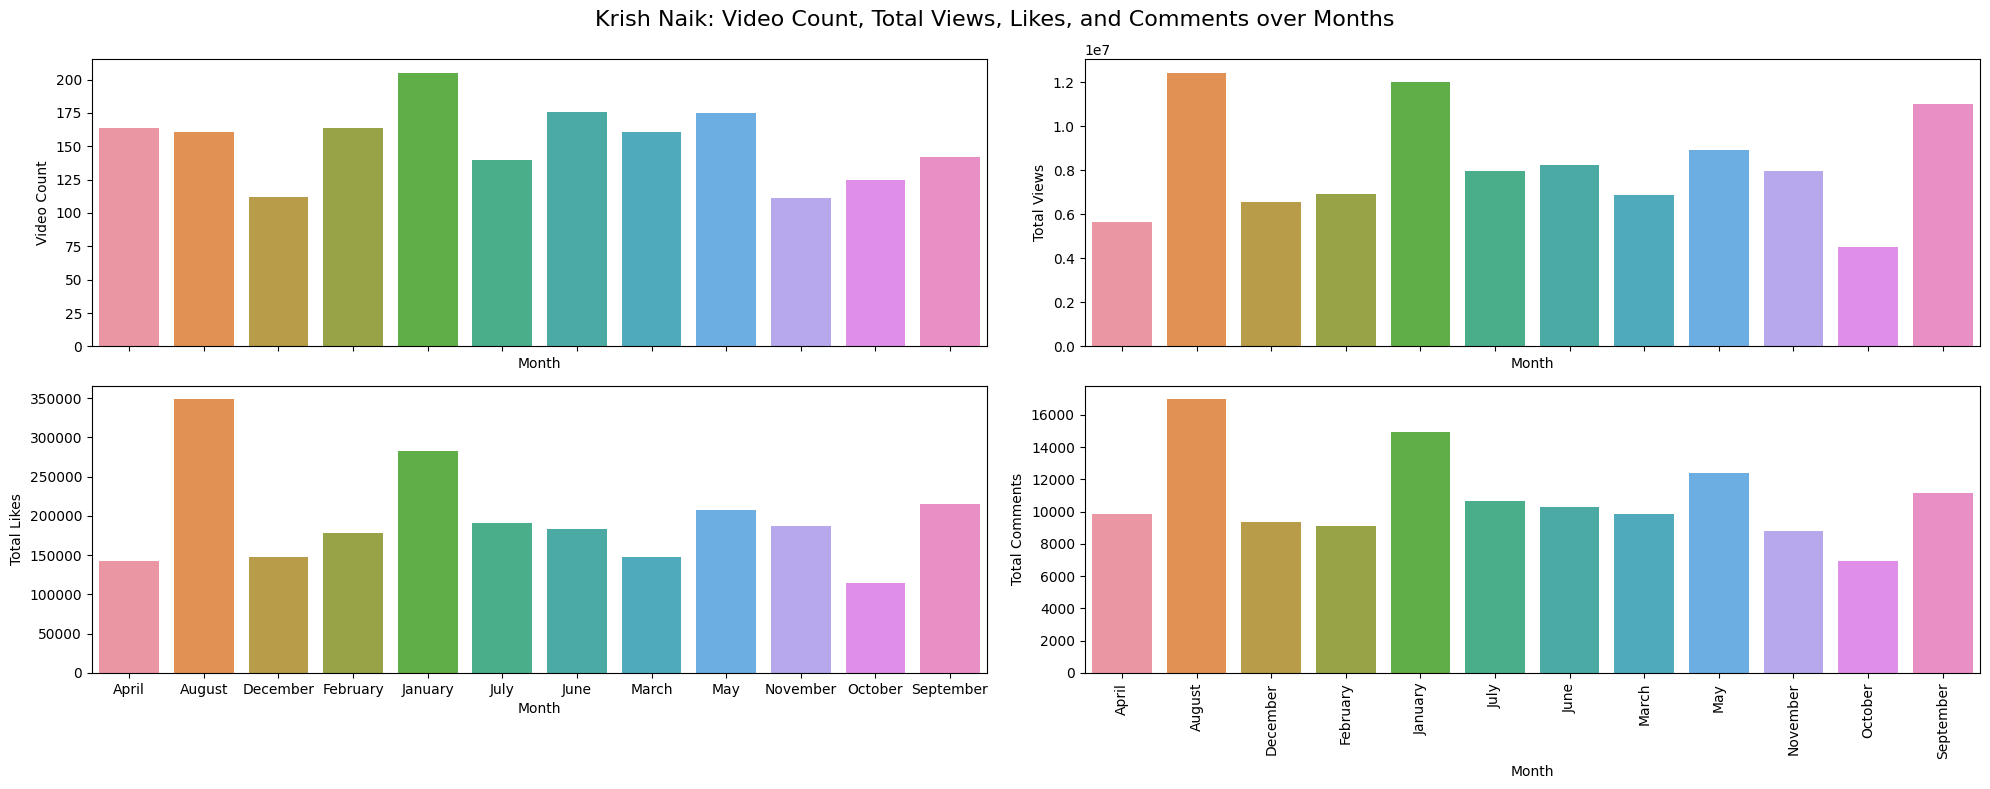

In [161]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8), sharex=True)
sns.barplot(data=df_KN_Month, x='Month', y='Video_Count', ax=ax1)
ax1.set_ylabel('Video Count')
sns.barplot(data=df_KN_Month, x='Month', y='Total_Views', ax=ax2)
ax2.set_ylabel('Total Views')
sns.barplot(data=df_KN_Month, x='Month', y='Total_Likes', ax=ax3)
ax3.set_ylabel('Total Likes')
sns.barplot(data=df_KN_Month, x='Month', y='Total_Comments', ax=ax4)
ax4.set_ylabel('Total Comments')
ax4.set_xlabel('Month')
plt.suptitle('Krish Naik: Video Count, Total Views, Likes, and Comments over Months', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Insights:
1. **Monthly Video Count**: The number of videos uploaded per month shows variability, with peaks in January, June, and May, suggesting periods of high content production.
   
2. **Total Views**: January and August record the highest total views, indicating peak viewer engagement during these months.
   
3. **Engagement Metrics (Likes and Comments)**: August stands out with significantly higher likes and comments, suggesting particularly engaging content or focused promotional efforts during that period.

`Krish Naik's` YouTube channel has exhibited distinct phases of growth over the years. Initially, from 2014 to 2018, the channel saw gradual development as it built its content and audience base. The launch of Jio 4G in 2016 marked a period of accelerated growth, characterized by increased video uploads and expanded viewer engagement due to improved internet accessibility. During the COVID-19 pandemic in 2020-2021, the channel experienced its peak in viewership, driven by heightened demand for online educational content. Post-2021, the channel's activity has stabilized, reflecting adjustments in content strategy amid changing viewer behaviors and market conditions.